<a href="https://colab.research.google.com/github/Potdooshami/2024_teenager_Math_AI_Acadmy/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%95%84%EC%B9%B4%EB%8D%B0%EB%AF%B8day3_2%EC%8B%9C%EC%B0%A8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#선형회귀를 이용한  시험점수 예측하기

![](https://lh6.googleusercontent.com/iMZgFgLouk68WBm487DDwYno28NOnKYU_IISbyAuhUDw1MCvJZ82BMItm_OZ5MFbXCdNOWzVGu7_1EeNJv9bcUHdc_svNo_vrS7STzKP9FFPWVjDlYz9mx0cpWPC6H6Omg=w1280)

##문제 정의
1) 설명변수와 타겟변수를 구분한다.

2) 변수들이 수치형인지 범주형인지 확인한다.

![](https://lh3.googleusercontent.com/bWuasYtIXqP3lxZQKSxLMT-dQz4ToOAIjg8kMsIVJVVufRer0FErCCPJKhTt86cjsI0LBpwESWXif-3pj37GTVO-jKlZHleKmBX4zcSjjDzdX_8AdfpXd8vdUrb7TiYrCQ=w1280)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

Text(0.5, 0, 'Stydy Time')

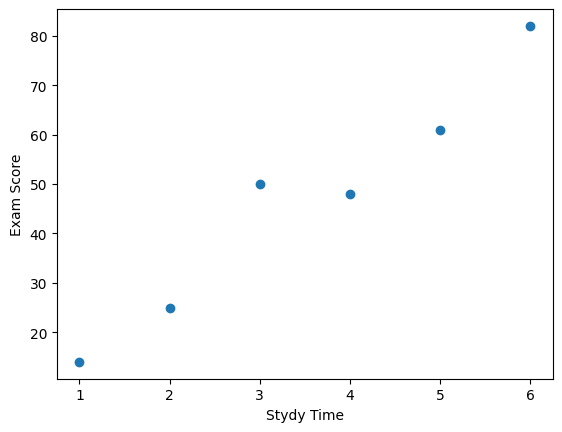

In [ ]:
xs = [1,2,3,4,5,6]
ys = [14,25,50,48,61,82]

fig,ax = plt.subplots()
ax.plot(xs,ys,'o')
plt.ylabel('Exam Score')
plt.xlabel('Stydy Time')


x:공부시간(수치)

y:점수(수치)

##파라미터 튜닝: m,c를 조절해서 적당한 직선 찾기

Text(0.5, 1.0, 'Linear Regression')

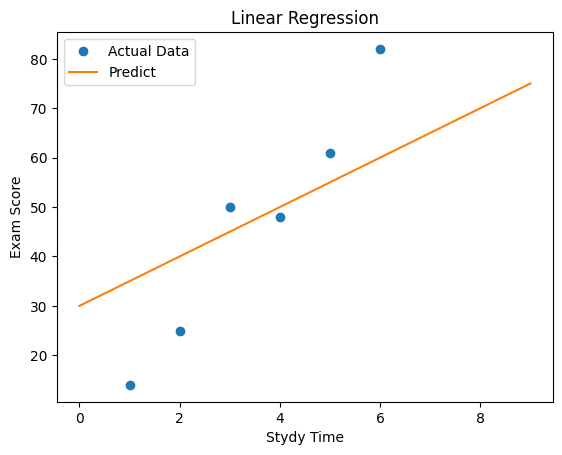

In [ ]:
m = 5 # @param {type:"raw"}
c = 30 # @param {type:"raw"}

fig,ax = plt.subplots()
ax.plot(xs,ys,'o',label='Actual Data')
plt.ylabel('Exam Score')
plt.xlabel('Stydy Time')
my_figure = fig


xx = np.arange(0,10)
plt.plot(xx,m*xx+c,label='Predict')
plt.legend()
plt.title('Linear Regression')

Text(0.5, 1.0, 'Linear Regression')

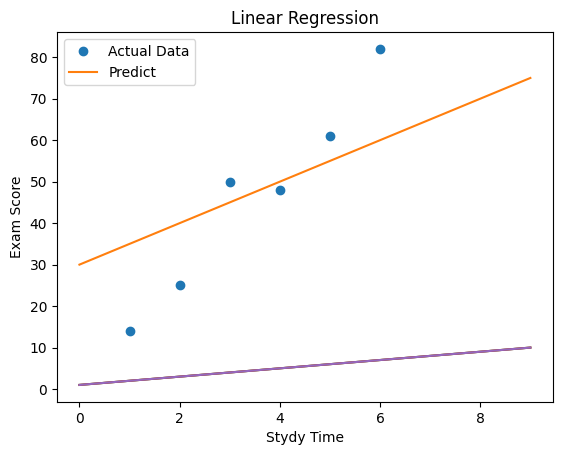

In [ ]:
nms = ['', '', '']# @param {type:"raw"}
ms = [1,1,1]# @param {type:"raw"}
cs = [1,1,1]# @param {type:"raw"}


plt.plot(xs,ys,'o',label='Actual Data')
plt.plot(xx,m*xx+c,label='Predict')
plt.ylabel('Exam Score')
plt.xlabel('Stydy Time')


for ind in range(3):
    m = ms[ind]
    c = cs[ind]
    xx = np.arange(0,10)
    plt.plot(xx,m*xx+c,label=nms[ind])
plt.legend()
plt.title('Linear Regression')

1)

##성능지표: 좋은 직선을 수학적으로 정의하기

441
225
25
4
36
484


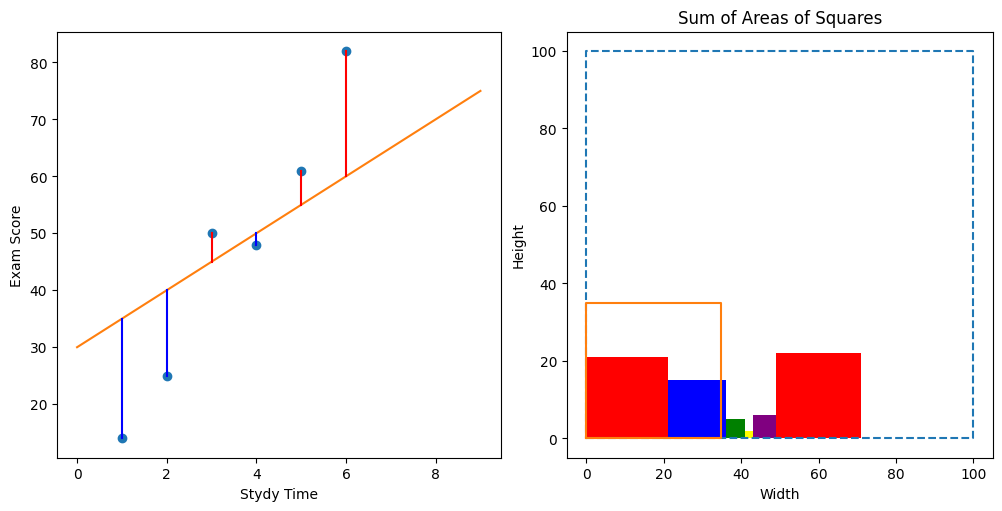

In [ ]:

c = 30# @param {type:"number"}
m = 5# @param {type:"number"}
fig, axs = plt.subplots(1, 2, layout='constrained',figsize=(10, 5))
plt.sca(axs[0])
plt.plot(xs,ys,'o',label='Actual Data')
plt.plot(xx,m*xx+c,label='Predict')
plt.ylabel('Exam Score')
plt.xlabel('Stydy Time')
xs = np.array(xs)
ys = np.array(ys)
errors = ys - (m*xs + c)
for i, error in enumerate(errors):
    if error >= 0:
        clr = 'red'
    else:
        clr = 'blue'
    plt.plot([xs[i], xs[i]], [xs[i]*m + c, ys[i]], color=clr, linestyle='-')




plt.sca(axs[1])
# 정사각형 넓이 리스트
square_areas = errors*errors

# 정사각형 색상 리스트
colors = ['red', 'blue', 'green', 'yellow', 'purple']

# 넓이 합 계산
total_area = sum(square_areas)

# 시각화 시작
ax = axs[1]

# 정사각형 그리기
start_x = 0
for i, area in enumerate(square_areas):
  #area = abs(errors[i])
    print(area)
    side = np.sqrt(area)  # 정사각형 한 변의 길이 계산
    rect = plt.Rectangle((start_x, 0), side, side, facecolor=colors[i % len(colors)])
    ax.add_patch(rect)
    start_x += side  # 다음 정사각형 시작 위치 설정

# 텍스트 추가 (넓이 합 표시)
#plt.text(0.5, -0.1, f'Total Area: {total_area}',
#         horizontalalignment='center', verticalalignment='center',
#         transform=ax.transAxes, fontsize=12)

# 그래프 설정


#ax.set_xlim([0, 100])
#ax.set_ylim([0, 100])  # y축 범위 설정
ax.set_aspect('equal')  # 정사각형 모양 유지
plt.title('Sum of Areas of Squares')
plt.xlabel('Width')
plt.ylabel('Height')
plt.plot([0, 100, 100, 0, 0],[0, 0, 100, 100, 0],'--')
lsum = np.sqrt(square_areas.sum())
xs_sum = np.array([0,1,1,0,0])
ys_sum = np.array([0,0,1,1,0])
plt.plot(xs_sum*lsum,ys_sum*lsum)
# 그래프 출력


x와 y값을 넣어주면 자동으로 m과 c를 정해줄 수는 없을까?

방법1. 가능한 한 경우의 수를 다 넣어 본다.
방법2. 미적분학을 써서 해석적인 답을 구한다.
방법3. 경사하강법을 사용한다

##파라미터 최적화


### 완전탐색법

In [ ]:
ms = np.linspace(0,20,100)
cs = np.linspace(-10,10,100)
mseAll = np.zeros((100, 100))
for im in range(len(ms)):
    for ic in range(len(cs)):
        m = ms[im]
        c = cs[ic]
        errors = ys - (m*xs + c)
        square_areas = errors*errors
        mseAll[im,ic] = square_areas.sum()/6


(63, 60)
12.727272727272727 2.121212121212121


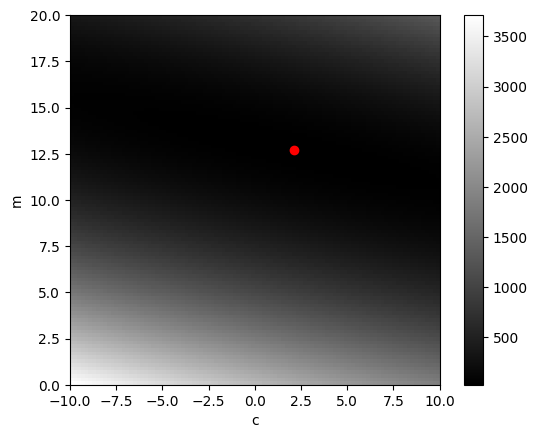

In [ ]:
plt.imshow(mseAll,cmap='gray',origin='lower',extent=[-10, 10, 0, 20])
plt.xlabel("c")
plt.ylabel("m")
plt.colorbar()
min_value = np.min(mseAll)
min_index = np.unravel_index(np.argmin(mseAll), mseAll.shape)
print(min_index)
m_op = ms[min_index[0]]
c_op = cs[min_index[1]]
print(m_op,c_op)
plt.plot(c_op,m_op,'ro')

###해석적 접근

####1. MSE 정의
단순 선형 회귀에서 MSE(Mean Squared Error)는 다음과 같이 정의됩니다:

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n \left( y_i - (a x_i + b) \right)^2
$

여기서:
- $y_i$: 실제 값  
- $a x_i + b$: 예측 값  
- $n$: 데이터의 개수  

MSE를 최소화하기 위해 $a$와 $b$에 대해 편미분하여 각각 0으로 설정합니다.

---

#### 2. MSE를 $a$에 대해 편미분
먼저 MSE를 $a$에 대해 편미분합니다:

$
\frac{\partial}{\partial a} \text{MSE} = \frac{\partial}{\partial a} \left( \frac{1}{n} \sum_{i=1}^n \left( y_i - (a x_i + b) \right)^2 \right)
$

상수 $\frac{1}{n}$은 밖으로 빼낼 수 있으므로:

$
\frac{\partial}{\partial a} \text{MSE} = \frac{1}{n} \sum_{i=1}^n \frac{\partial}{\partial a} \left( y_i - (a x_i + b) \right)^2
$

제곱항을 미분하면 다음과 같습니다:

$
\frac{\partial}{\partial a} \left( y_i - (a x_i + b) \right)^2 = 2 \left( y_i - (a x_i + b) \right) \cdot \frac{\partial}{\partial a} \left( y_i - (a x_i + b) \right)
$

여기서 $\frac{\partial}{\partial a} (y_i - (a x_i + b)) = -x_i$이므로:

$
\frac{\partial}{\partial a} \left( y_i - (a x_i + b) \right)^2 = -2 \left( y_i - (a x_i + b) \right) x_i
$

이를 전체 식에 대입하면:

$
\frac{\partial}{\partial a} \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left[ -2 \left( y_i - (a x_i + b) \right) x_i \right]
$

상수 $-2$를 빼내면:

$
\frac{\partial}{\partial a} \text{MSE} = -\frac{2}{n} \sum_{i=1}^n x_i \left( y_i - (a x_i + b) \right)
$

이를 $0$으로 설정하여 최소화를 찾습니다:

$
-\frac{2}{n} \sum_{i=1}^n x_i \left( y_i - (a x_i + b) \right) = 0
$

양변에 $-\frac{2}{n}$을 곱하면:

$
\sum_{i=1}^n x_i \left( y_i - (a x_i + b) \right) = 0
$

괄호를 전개하면:

$
\sum_{i=1}^n x_i y_i - \sum_{i=1}^n a x_i^2 - \sum_{i=1}^n b x_i = 0
$

이를 $a$와 $b$에 관한 식으로 정리하면:

$
a \sum_{i=1}^n x_i^2 + b \sum_{i=1}^n x_i = \sum_{i=1}^n x_i y_i \tag{1}
$

---

#### 3. MSE를 $b$에 대해 편미분
이번에는 MSE를 $b$에 대해 편미분합니다:

$
\frac{\partial}{\partial b} \text{MSE} = \frac{\partial}{\partial b} \left( \frac{1}{n} \sum_{i=1}^n \left( y_i - (a x_i + b) \right)^2 \right)
$

상수 $\frac{1}{n}$은 밖으로 빼낼 수 있으므로:

$
\frac{\partial}{\partial b} \text{MSE} = \frac{1}{n} \sum_{i=1}^n \frac{\partial}{\partial b} \left( y_i - (a x_i + b) \right)^2
$

제곱항을 미분하면:

$
\frac{\partial}{\partial b} \left( y_i - (a x_i + b) \right)^2 = 2 \left( y_i - (a x_i + b) \right) \cdot \frac{\partial}{\partial b} \left( y_i - (a x_i + b) \right)
$

여기서 $\frac{\partial}{\partial b} (y_i - (a x_i + b)) = -1$이므로:

$
\frac{\partial}{\partial b} \left( y_i - (a x_i + b) \right)^2 = -2 \left( y_i - (a x_i + b) \right)
$

이를 전체 식에 대입하면:

$
\frac{\partial}{\partial b} \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left[ -2 \left( y_i - (a x_i + b) \right) \right]
$

상수 $-2$를 빼내면:

$
\frac{\partial}{\partial b} \text{MSE} = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (a x_i + b) \right)
$

이를 $0$으로 설정하여 최소화를 찾습니다:

$
-\frac{2}{n} \sum_{i=1}^n \left( y_i - (a x_i + b) \right) = 0
$

양변에 $-\frac{2}{n}$을 곱하면:

$
\sum_{i=1}^n \left( y_i - (a x_i + b) \right) = 0
$

괄호를 전개하면:

$
\sum_{i=1}^n y_i - a \sum_{i=1}^n x_i - b \sum_{i=1}^n 1 = 0
$

여기서 $\sum_{i=1}^n 1 = n$이므로:

$
a \sum_{i=1}^n x_i + b n = \sum_{i=1}^n y_i \tag{2}
$

---

#### 4. 연립 방정식 정리
위에서 얻은 두 식 $(1)$과 $(2)$를 연립하여 $a$와 $b$를 구합니다:

1. $a \sum x_i^2 + b \sum x_i = \sum x_i y_i$
2. $a \sum x_i + b n = \sum y_i$

이 두 식을 풀면 $a$와 $b$의 값을 다음과 같이 얻습니다:

$
a = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}
$

$
b = \frac{\sum y_i - a \sum x_i}{n}
$


###경사 하강법

In [ ]:
n = xs.shape[0]
a = (n * np.sum(xs * ys) - np.sum(xs) * np.sum(ys)) / (n * np.sum(xs**2) - np.sum(xs)**2)
b = (np.sum(ys) - a * np.sum(xs)) / n
print(a,b)

12.742857142857142 2.066666666666672


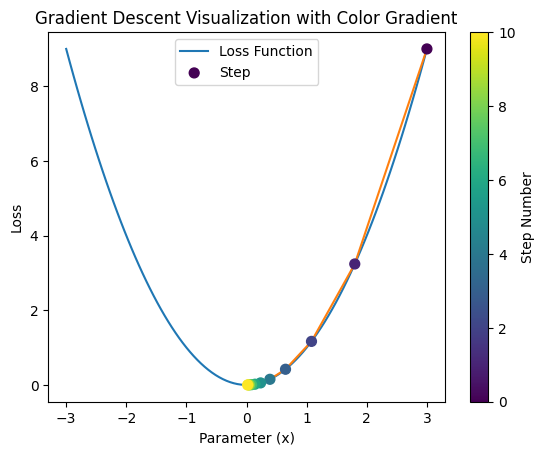

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 손실 함수 (y = x^2)
def loss(x):
    return x**2

# 손실 함수의 기울기
def gradient(x):
    return 2 * x

# 경사하강법
x = 3  # 초기값
learning_rate = 0.2# @param {type:"raw"}
steps = 10
history = [x]

for _ in range(steps):
    grad = gradient(x)
    x -= learning_rate * grad  # 업데이트
    history.append(x)

# 시각화
x_vals = np.linspace(-3, 3, 100)
y_vals = loss(x_vals)

# 컬러맵 데이터 준비
steps_array = np.arange(len(history))  # 단계 수를 나타내는 배열
colors = plt.cm.viridis(steps_array / len(history))  # 단계별 색상 매핑

plt.plot(x_vals, y_vals, label="Loss Function")
plt.plot(history,[loss(x) for x in history])
scatter = plt.scatter(history, [loss(x) for x in history], c=steps_array, cmap="viridis", s=50, zorder=5,label='Step')

# 컬러바 추가
cbar = plt.colorbar(scatter)
cbar.set_label("Step Number")

plt.title("Gradient Descent Visualization with Color Gradient")
plt.xlabel("Parameter (x)")
plt.ylabel("Loss")
plt.legend()
plt.show()

결론: 머신러닝은

#SVM을 이용한 붓꽃의 품종 분류

![](https://sundeeppothula1993.github.io/ARTML//assets/img/iris.png)

sepal length와 petal width를 이용해 품종(3개 중 하나)를 예측하기

x1: sepal length (수치)

x2: petal width (수치)

y: 품종 (범주)

In [ ]:
import pandas as pd
from sklearn import datasets

# Iris 데이터셋 로드
iris = datasets.load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
#df['target_name'] = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 데이터 확인
df.columns
className = ['setosa', 'versicolor', 'virginica']
df

xColinds = [0,3]
xminmax = np.array([df.iloc[:,xColinds].min(),df.iloc[:,xColinds].max()])
df.iloc[:,xColinds]
print(df.iloc[:,-1])
lbl = df.columns[xColinds]
print(lbl)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64
Index(['sepal length (cm)', 'petal width (cm)'], dtype='object')




$
w_1x_1+w_2x_2 + b=0
$

$
w_1x_1+w_2x_2 + b=1
$

$
w_1x_1+w_2x_2 + b=-1
$


##파라미터 튜닝: w1,w2,b

1.0 -2.0 1.0
-1.0 1.0 2.5
-1.02959295 2.91132701 -1.7983700648051586


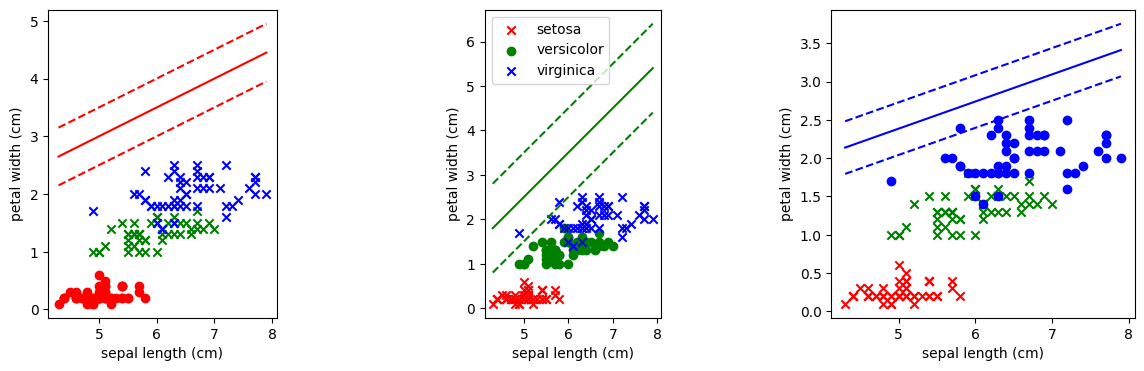

In [ ]:
xc = xColinds;
w11 = 1 # @param {type:"raw"}
w21 = -2. # @param {type:"raw"}
b1 = 1 # @param {type:"raw"}

w12 = -1 # @param {type:"raw"}
w22 = 1 # @param {type:"raw"}
b2 = 2.5 # @param {type:"raw"}

w13 = -1.02959295 # @param {type:"raw"}
w23 = 2.91132701 # @param {type:"raw"}
b3 = -1.7983700648051586 # @param {type:"raw"}



wb = np.array([[w11, w21, b1],
               [w12, w22, b2],
               [w13, w23, b3]])



x1 = df.iloc[:,xc[0]]
x2 = df.iloc[:,xc[1]]
c1 = df.iloc[:,-1]
c2 = df.iloc[:,-1] == 0
clrs = ['red','green','blue']
ls = ['--','-','--']

fig,axs = plt.subplots(1,3,figsize=(15,4))



for fcsClass in range(3):
  plt.sca(axs[fcsClass])
  for indClass in range(3):
    if fcsClass == indClass:
      mk = 'o'
    else:
      mk = 'x'
    posClass = df.iloc[:,-1] == indClass
    x1_ = x1[posClass]
    x2_ = x2[posClass]
    plt.scatter(x1_,x2_,c=clrs[indClass],marker = mk)
  w1 = wb[fcsClass,0]
  w2 = wb[fcsClass,1]
  b = wb[fcsClass,2]
  print(w1,w2,b)
  x1_hp = xminmax[:,0]
  for indHP in [0, 1, 2]:
    x2_hp = (-w1 * x1_hp - b+indHP-1) / w2
    plt.plot(x1_hp,x2_hp,c=clrs[fcsClass],linestyle = ls[indHP])
  #plt.xlim([4, 8.2])  # xlim 설정
  #plt.ylim([0, 2.6])  # ylim 설정
  ax = plt.gca()
  ax.set_aspect('equal', adjustable='box')
  if fcsClass == 1:
    plt.legend(className)
  plt.xlabel(lbl[0])
  plt.ylabel(lbl[1])
  #plt.xlim([4, 8.2])  # xlim 설정
  #plt.ylim([0, 2.6])  # ylim 설정





  #ax.set_aspect('equal')

##모델 선언 및 훈련

###외부 라이브러리를 사용하기

In [ ]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
c = 1000000000000000000000000000000 # @param {type:"raw"}
model = LinearSVC(C=c)
model.fit(df.iloc[:,xc],df.iloc[:,[-1]])
print(model.coef_)
print(model.intercept_)

[[ 0.34368337 -5.85920843]
 [-0.05881087  0.19857534]
 [ 0.08632526  4.22030388]]
[ 2.7971082  -0.22783982 -7.4324037 ]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


잘 학습 되었는지 확인하기

0.343683372159662 -5.859208430399155 2.7971081974411836
-0.05881087393016737 0.19857533989663273 -0.22783981765075
0.08632525502127325 4.220303883221744 -7.432403700924143


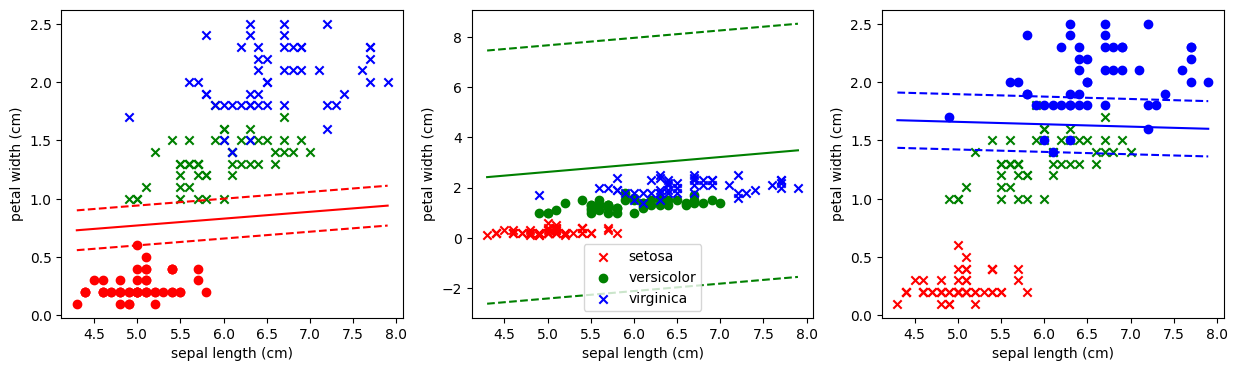

In [ ]:
wb =np.concatenate((model.coef_,model.intercept_.reshape(3,1)),axis=1)




fig,axs = plt.subplots(1,3,figsize=(15,4))



for fcsClass in range(3):
  plt.sca(axs[fcsClass])
  for indClass in range(3):
    if fcsClass == indClass:
      mk = 'o'
    else:
      mk = 'x'
    posClass = df.iloc[:,-1] == indClass
    x1_ = x1[posClass]
    x2_ = x2[posClass]
    plt.scatter(x1_,x2_,c=clrs[indClass],marker = mk)
  w1 = wb[fcsClass,0]
  w2 = wb[fcsClass,1]
  b = wb[fcsClass,2]
  print(w1,w2,b)
  x1_hp = xminmax[:,0]
  if fcsClass == 1:
    plt.legend(className)
  for indHP in [0, 1, 2]:
    x2_hp = (-w1 * x1_hp - b+indHP-1) / w2
    plt.plot(x1_hp,x2_hp,c=clrs[fcsClass],linestyle = ls[indHP])
  plt.xlabel(lbl[0])
  plt.ylabel(lbl[1])





  #ax.set_aspect('equal')
foo= plt.gcf

## 하이퍼 파라미터 튜닝: C

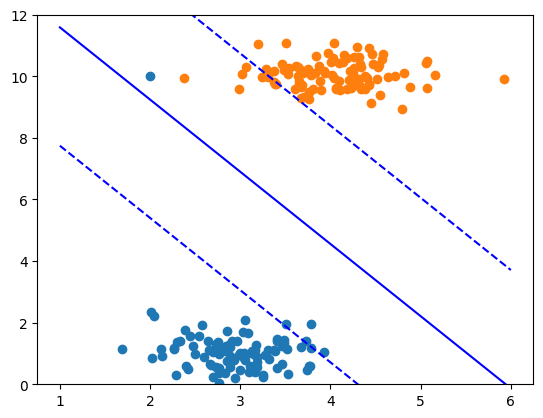

In [ ]:
c1 = [3,1]
c2 = [4, 10]
std = 0.5
num_points = 100
np.random.seed(42)
x1 = np.random.normal(loc=c1[0], scale=std, size=num_points)
y1 = np.random.normal(loc=c1[1], scale=std, size=num_points)
x1[-1] =2
y1[-1] = 10
x2 = np.random.normal(loc=c2[0], scale=std, size=num_points)
y2 = np.random.normal(loc=c2[1], scale=std, size=num_points)
xx = np.concatenate((x1, x2), axis=0).reshape(200,1)
yy = np.concatenate((y1, y2), axis=0).reshape(200,1)
xxyy = np.concatenate((xx, yy), axis=1)

cc = np.concatenate((np.zeros((1, 100)), np.ones((1, 100))), axis=1)

plt.scatter(x1,y1)
plt.scatter(x2,y2)

c = 10 # @param {type:"raw"}
model = LinearSVC(C=c)
model.fit(xxyy,cc.flatten())

for indHP in [0, 1, 2]:
  w1 = model.coef_[0,0]
  w2 = model.coef_[0,1]
  b = model.intercept_
  x1_hp = np.array([1,6])
  x2_hp = (-w1 * x1_hp - b+indHP-1) / w2
  plt.plot(x1_hp,x2_hp,c=clrs[fcsClass],linestyle = ls[indHP])
  plt.ylim([0, 12])  # ylim 설정